In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import cv2

In [ ]:
def drawImg(img,title="Image"):
  plt.imshow(img,cmap='gray')
  plt.axis("off")
  plt.title(title+str(img.shape))
  plt.show()

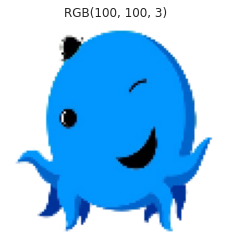

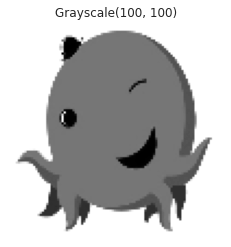

In [ ]:
img_ = cv2.imread("/content/img_Oswald.png")
img_ = cv2.resize(img_,(100,100))
img = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
drawImg(img,"RGB")
drawImg(img_gray,"Grayscale")

In [ ]:
def convolution(img,img_filter):
  W = img.shape[0]
  H = img.shape[1]
  F = img_filter.shape[0]

  new_img = np.zeros((W-F+1,H-F+1))

  for row in range(W-F+1):
    for col in range(H-F+1):
      for i in range(F):
        for j in range(F):
          new_img[row][col] += img[row+i][col+j]*img_filter[i][j]

        if new_img[row][col] > 255:
          new_img[row][col] = 255

        elif new_img[row][col] < 0:
          new_img[row][col] = 0

  return new_img #Activation map        

In [ ]:
blur_filter = np.ones((3,3))/9.0
output1 = convolution(img_gray,blur_filter)

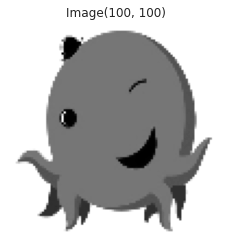

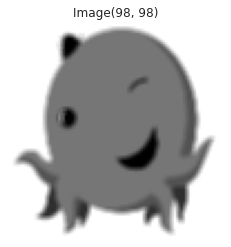

In [ ]:
drawImg(img_gray)
drawImg(output1)

In [ ]:
edge_filter = np.array(([1,0,-1],
                        [1,0,-1],
                        [1,0,-1]))
output2 = convolution(img_gray,edge_filter)

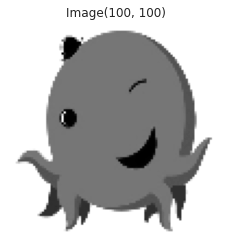

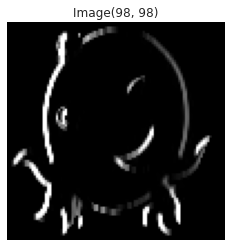

In [ ]:
drawImg(img_gray)
drawImg(output2)

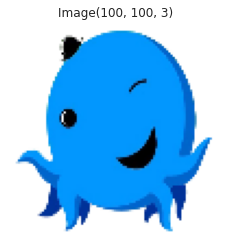

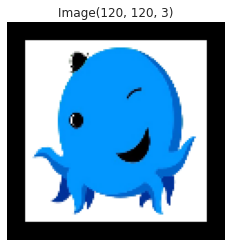

In [ ]:
drawImg(img)

#padding the image
pad_img = np.pad(img,((10,10),(10,10),(0,0)),'constant',constant_values=0)
drawImg(pad_img)